In [2]:
import pandas as pd

In [3]:
# Series: 1-dimensional

In [4]:
cars = pd.Series(['BMW', 'Mercedes','Tesla'])
cars

0         BMW
1    Mercedes
2       Tesla
dtype: object

In [5]:
colors = pd.Series(['Red', 'Blue', 'White'])
colors

0      Red
1     Blue
2    White
dtype: object

In [6]:
# DataFrame: 2-dimensional

In [7]:
car_data = pd.DataFrame({'Brand':cars, 'Color':colors})
car_data

,Brand,Color
0,BMW,Red
1,Mercedes,Blue
2,Tesla,White


In [8]:
car_sales = pd.read_csv('car_sales.csv')
car_sales.head()
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [9]:
# loc and iloc
animals = pd.Series(['Cat','Dog','Snake','Panda','Horse'], index=[2,4,6,8,10])
animals

2       Cat
4       Dog
6     Snake
8     Panda
10    Horse
dtype: object

In [10]:
animals.loc[4]

'Dog'

In [11]:
animals.iloc[4]

'Horse'

In [12]:
car_sales.loc[7]

Make                 Honda
Colour                Blue
Odometer (KM)        54738
Doors                    4
Price            $7,000.00
Name: 7, dtype: object

In [13]:
car_sales.iloc[7]

Make                 Honda
Colour                Blue
Odometer (KM)        54738
Doors                    4
Price            $7,000.00
Name: 7, dtype: object

In [14]:
car_sales.iloc[:5]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [15]:
car_sales.iloc[5:]

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [16]:
car_sales['Make']

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [17]:
car_sales.Make

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [18]:
# boolean indexing

In [19]:
car_sales[car_sales["Make"] == 'Toyota']

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [20]:
# comparing columns

In [21]:
pd.crosstab(car_sales["Make"], car_sales['Doors'])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [22]:
car_sales.groupby("Make")

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


In [23]:
# visualization

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

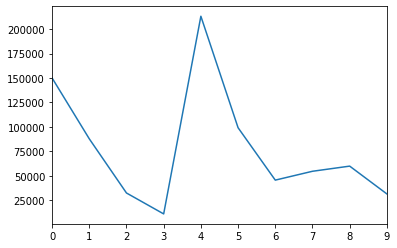

In [25]:
car_sales["Odometer (KM)"].plot()

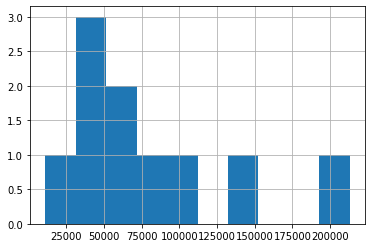

In [26]:
car_sales["Odometer (KM)"].hist()

In [27]:
# converting price object to int

In [28]:
car_sales['Price'] = car_sales.Price.str.replace('\$|\.|\,', '').astype(int)

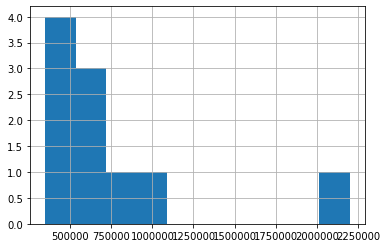

In [29]:
car_sales["Price"].hist()

## Manipulating Data

In [35]:
car_sales["Make"] = car_sales["Make"].str.lower()
car_sales["Make"]

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [44]:
missing_data = pd.read_csv("missing_sales_data.csv")
missing_data.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [45]:
missing_data['Odometer'].fillna(missing_data['Odometer'].mean(), inplace=True)

In [46]:
missing_data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [48]:
missing_data_dropped = missing_data.dropna()
missing_data_dropped.to_csv("car_sales_missing_dropped.csv")

In [50]:
# Adding new column from series into DataFrame
seats_column = pd.Series([5,5,5,5,5])
car_sales["Seats"] = seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,400000,5.0
1,honda,Red,87899,4,500000,5.0
2,toyota,Blue,32549,3,700000,5.0
3,bmw,Black,11179,5,2200000,5.0
4,nissan,White,213095,4,350000,5.0
5,toyota,Green,99213,4,450000,NaN
6,honda,Blue,45698,4,750000,NaN
7,honda,Blue,54738,4,700000,NaN
8,toyota,White,60000,4,625000,NaN
9,nissan,White,31600,4,970000,NaN


In [53]:
car_sales["Seats"].fillna(5, inplace=True)

In [55]:
# Adding new column from Python list
fuel_economy = [7.5,9.2,5.0,9.6,8.7,4.7,7.6,8.7,3.0,4.5]
car_sales["Fuel Economy"] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy
0,toyota,White,150043,4,400000,5.0,7.5
1,honda,Red,87899,4,500000,5.0,9.2
2,toyota,Blue,32549,3,700000,5.0,5.0
3,bmw,Black,11179,5,2200000,5.0,9.6
4,nissan,White,213095,4,350000,5.0,8.7
5,toyota,Green,99213,4,450000,5.0,4.7
6,honda,Blue,45698,4,750000,5.0,7.6
7,honda,Blue,54738,4,700000,5.0,8.7
8,toyota,White,60000,4,625000,5.0,3.0
9,nissan,White,31600,4,970000,5.0,4.5


In [58]:
fuel_used = car_sales["Odometer (KM)"]/car_sales["Fuel Economy"]
car_sales["Fuel Used"] = fuel_used
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Fuel Used
0,toyota,White,150043,4,400000,5.0,7.5,20005.733333
1,honda,Red,87899,4,500000,5.0,9.2,9554.239130
2,toyota,Blue,32549,3,700000,5.0,5.0,6509.800000
3,bmw,Black,11179,5,2200000,5.0,9.6,1164.479167
4,nissan,White,213095,4,350000,5.0,8.7,24493.678161
5,toyota,Green,99213,4,450000,5.0,4.7,21109.148936
6,honda,Blue,45698,4,750000,5.0,7.6,6012.894737
7,honda,Blue,54738,4,700000,5.0,8.7,6291.724138
8,toyota,White,60000,4,625000,5.0,3.0,20000.000000
9,nissan,White,31600,4,970000,5.0,4.5,7022.222222


In [59]:
# Creating column from single value
car_sales["Number of Wheels"] = 4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Fuel Used,Number of Wheels
0,toyota,White,150043,4,400000,5.0,7.5,20005.733333,4
1,honda,Red,87899,4,500000,5.0,9.2,9554.239130,4
2,toyota,Blue,32549,3,700000,5.0,5.0,6509.800000,4
3,bmw,Black,11179,5,2200000,5.0,9.6,1164.479167,4
4,nissan,White,213095,4,350000,5.0,8.7,24493.678161,4
5,toyota,Green,99213,4,450000,5.0,4.7,21109.148936,4
6,honda,Blue,45698,4,750000,5.0,7.6,6012.894737,4
7,honda,Blue,54738,4,700000,5.0,8.7,6291.724138,4
8,toyota,White,60000,4,625000,5.0,3.0,20000.000000,4
9,nissan,White,31600,4,970000,5.0,4.5,7022.222222,4


In [61]:
car_sales["Fuel Used (L)"] = fuel_used
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Fuel Used,Number of Wheels,Fuel Used (L)
0,toyota,White,150043,4,400000,5.0,7.5,20005.733333,4,20005.733333
1,honda,Red,87899,4,500000,5.0,9.2,9554.239130,4,9554.239130
2,toyota,Blue,32549,3,700000,5.0,5.0,6509.800000,4,6509.800000
3,bmw,Black,11179,5,2200000,5.0,9.6,1164.479167,4,1164.479167
4,nissan,White,213095,4,350000,5.0,8.7,24493.678161,4,24493.678161
5,toyota,Green,99213,4,450000,5.0,4.7,21109.148936,4,21109.148936
6,honda,Blue,45698,4,750000,5.0,7.6,6012.894737,4,6012.894737
7,honda,Blue,54738,4,700000,5.0,8.7,6291.724138,4,6291.724138
8,toyota,White,60000,4,625000,5.0,3.0,20000.000000,4,20000.000000
9,nissan,White,31600,4,970000,5.0,4.5,7022.222222,4,7022.222222


In [62]:
# Dropping columns
car_sales = car_sales.drop("Fuel Used", axis=1)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Number of Wheels,Fuel Used (L)
0,toyota,White,150043,4,400000,5.0,7.5,4,20005.733333
1,honda,Red,87899,4,500000,5.0,9.2,4,9554.239130
2,toyota,Blue,32549,3,700000,5.0,5.0,4,6509.800000
3,bmw,Black,11179,5,2200000,5.0,9.6,4,1164.479167
4,nissan,White,213095,4,350000,5.0,8.7,4,24493.678161
5,toyota,Green,99213,4,450000,5.0,4.7,4,21109.148936
6,honda,Blue,45698,4,750000,5.0,7.6,4,6012.894737
7,honda,Blue,54738,4,700000,5.0,8.7,4,6291.724138
8,toyota,White,60000,4,625000,5.0,3.0,4,20000.000000
9,nissan,White,31600,4,970000,5.0,4.5,4,7022.222222


In [73]:
# Randomized shuffling (for sampling frac amount)
car_sales_shuffled = car_sales.sample(frac=1)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Number of Wheels,Fuel Used (L)
3,bmw,Black,11179,5,2200000,5.0,9.6,4,1164.479167
1,honda,Red,87899,4,500000,5.0,9.2,4,9554.239130
0,toyota,White,150043,4,400000,5.0,7.5,4,20005.733333
8,toyota,White,60000,4,625000,5.0,3.0,4,20000.000000
9,nissan,White,31600,4,970000,5.0,4.5,4,7022.222222
4,nissan,White,213095,4,350000,5.0,8.7,4,24493.678161
2,toyota,Blue,32549,3,700000,5.0,5.0,4,6509.800000
7,honda,Blue,54738,4,700000,5.0,8.7,4,6291.724138
5,toyota,Green,99213,4,450000,5.0,4.7,4,21109.148936
6,honda,Blue,45698,4,750000,5.0,7.6,4,6012.894737


In [74]:
# Resetting index
car_sales_shuffled.reset_index(drop=True, inplace=True)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Number of Wheels,Fuel Used (L)
0,bmw,Black,11179,5,2200000,5.0,9.6,4,1164.479167
1,honda,Red,87899,4,500000,5.0,9.2,4,9554.239130
2,toyota,White,150043,4,400000,5.0,7.5,4,20005.733333
3,toyota,White,60000,4,625000,5.0,3.0,4,20000.000000
4,nissan,White,31600,4,970000,5.0,4.5,4,7022.222222
5,nissan,White,213095,4,350000,5.0,8.7,4,24493.678161
6,toyota,Blue,32549,3,700000,5.0,5.0,4,6509.800000
7,honda,Blue,54738,4,700000,5.0,8.7,4,6291.724138
8,toyota,Green,99213,4,450000,5.0,4.7,4,21109.148936
9,honda,Blue,45698,4,750000,5.0,7.6,4,6012.894737


In [77]:
# Applying function to DataFrame
car_sales["Odometer (mi)"] = car_sales["Odometer (KM)"].apply(lambda x: x/1.6)
car_sales.drop("Odome")
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy,Number of Wheels,Fuel Used (L),Odometer (i),Odometer (mi)
0,toyota,White,150043,4,400000,5.0,7.5,4,20005.733333,93776.875,93776.875
1,honda,Red,87899,4,500000,5.0,9.2,4,9554.239130,54936.875,54936.875
2,toyota,Blue,32549,3,700000,5.0,5.0,4,6509.800000,20343.125,20343.125
3,bmw,Black,11179,5,2200000,5.0,9.6,4,1164.479167,6986.875,6986.875
4,nissan,White,213095,4,350000,5.0,8.7,4,24493.678161,133184.375,133184.375
5,toyota,Green,99213,4,450000,5.0,4.7,4,21109.148936,62008.125,62008.125
6,honda,Blue,45698,4,750000,5.0,7.6,4,6012.894737,28561.250,28561.250
7,honda,Blue,54738,4,700000,5.0,8.7,4,6291.724138,34211.250,34211.250
8,toyota,White,60000,4,625000,5.0,3.0,4,20000.000000,37500.000,37500.000
9,nissan,White,31600,4,970000,5.0,4.5,4,7022.222222,19750.000,19750.000
